In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer

In [2]:
hotel = pd.read_csv('data/hotel_bookings.csv')

In [3]:
# 결측치 평균괎으로 채워주기
hotel.iloc[:, 23].fillna(hotel.iloc[:, 23].mean(), inplace = True)
hotel.iloc[:, 10].fillna(hotel.iloc[:, 10].mean(), inplace = True)

In [4]:
# 상관계수 낮은 컬럼 drop
hotel.drop(['children', 'stays_in_weekend_nights', 'arrival_date_day_of_month', 'company', 'reservation_status_date'], axis = 1, inplace = True)

In [5]:
hotel.drop(['arrival_date_week_number'], axis = 1, inplace = True)

In [6]:
hotel.drop(['country'], axis = 1, inplace = True)

In [7]:
# reservaton_status 컬럼 drop
# reservation_status 컬럼에 Canceled 상태가 있어서
hotel.drop(['reservation_status'], axis = 1, inplace = True)

In [8]:
# X, y 나누기
X = (hotel.loc[:, hotel.columns != 'is_canceled'])
y = (hotel.loc[:, hotel.columns == 'is_canceled'])
X.shape, y.shape

((119390, 23), (119390, 1))

In [9]:
encoder = LabelEncoder()
X['hotel'] = encoder.fit_transform(X['hotel'])
X['hotel']

c:\users\jiyoon\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0         1
1         1
2         1
3         1
4         1
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: hotel, Length: 119390, dtype: int32

In [10]:
X['arrival_date_month'] = encoder.fit_transform(X['arrival_date_month'])
X['arrival_date_month']

c:\users\jiyoon\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         5
1         5
2         5
3         5
4         5
         ..
119385    1
119386    1
119387    1
119388    1
119389    1
Name: arrival_date_month, Length: 119390, dtype: int32

In [11]:
X['meal'] = encoder.fit_transform(X['meal'])
X['meal']

c:\users\jiyoon\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    2
Name: meal, Length: 119390, dtype: int32

In [12]:
X['market_segment'] = encoder.fit_transform(X['market_segment'])
X['market_segment']

c:\users\jiyoon\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         3
1         3
2         3
3         2
4         6
         ..
119385    5
119386    6
119387    6
119388    6
119389    6
Name: market_segment, Length: 119390, dtype: int32

In [13]:
X['distribution_channel'] = encoder.fit_transform(X['distribution_channel'])
X['distribution_channel']

c:\users\jiyoon\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         1
1         1
2         1
3         0
4         3
         ..
119385    3
119386    3
119387    3
119388    3
119389    3
Name: distribution_channel, Length: 119390, dtype: int32

In [14]:
X['reserved_room_type'] = encoder.fit_transform(X['reserved_room_type'])
X['reserved_room_type']

c:\users\jiyoon\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         2
1         2
2         0
3         0
4         0
         ..
119385    0
119386    4
119387    3
119388    0
119389    0
Name: reserved_room_type, Length: 119390, dtype: int32

In [15]:
X['assigned_room_type'] = encoder.fit_transform(X['assigned_room_type'])
X['assigned_room_type']

c:\users\jiyoon\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         2
1         2
2         2
3         0
4         0
         ..
119385    0
119386    4
119387    3
119388    0
119389    0
Name: assigned_room_type, Length: 119390, dtype: int32

In [16]:
X['deposit_type'] = encoder.fit_transform(X['deposit_type'])
X['deposit_type']

c:\users\jiyoon\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: deposit_type, Length: 119390, dtype: int32

In [17]:
X['customer_type'] = encoder.fit_transform(X['customer_type'])
X['customer_type']

c:\users\jiyoon\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         2
1         2
2         2
3         2
4         2
         ..
119385    2
119386    2
119387    2
119388    2
119389    2
Name: customer_type, Length: 119390, dtype: int32

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int32  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int32  
 4   stays_in_week_nights            119390 non-null  int64  
 5   adults                          119390 non-null  int64  
 6   babies                          119390 non-null  int64  
 7   meal                            119390 non-null  int32  
 8   market_segment                  119390 non-null  int32  
 9   distribution_channel            119390 non-null  int32  
 10  is_repeated_guest               119390 non-null  int64  
 11  previous_cancellations          119390 non-null  int64  
 12  previous_booking

In [19]:
# Train/Test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

# 데이터셋 나누기 - train/validation 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 1)

In [20]:
# tree = DecisionTreeClassifier(random_state = 1)
# tree.fit(X_train, y_train)

In [21]:
# 랜덤포레스트
rf = RandomForestClassifier(max_depth = 19,
                            max_features = 9,
                            n_estimators = 200,
                            random_state = 1)

In [22]:
# pred_train = tree.predict(X_train)
# pred_test = tree.predict(X_test)

In [23]:
# 랜덤 포레스트 모델 학습
rf.fit(X_train, y_train)

c:\users\jiyoon\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=19, max_features=9, n_estimators=200,
                       random_state=1)

In [24]:
# 검증
# accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

In [26]:
# 예측
pred_train_rf = rf.predict(X_train)
pred_val_rf = rf.predict(X_val)
pred_test_rf = rf.predict(X_test)

In [ ]:
# 반올림되어서 대부분 1.0
# from sklearn.metrics import classification_report
# print(classification_report(y_train, pred_train))

In [27]:
X_train.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'stays_in_week_nights', 'adults', 'babies', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [ ]:
tree.feature_importances_

In [ ]:
np.sort(rf.feature_importances_)

In [ ]:
rf.feature_importances_

In [ ]:
# 0.25217154 - deposit_type
# 0.14699334 - lead_time
# 0.08355857 - adr

In [33]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(RandomForestClassifier(n_estimators = 200,
                                             max_depth = 10,
                                             n_jobs = -1,
                                             random_state = 1))

In [34]:
model.fit(X_train, y_train)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        n_jobs=-1, random_state=1))])

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1e202c890c8>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1e202d85f08>})

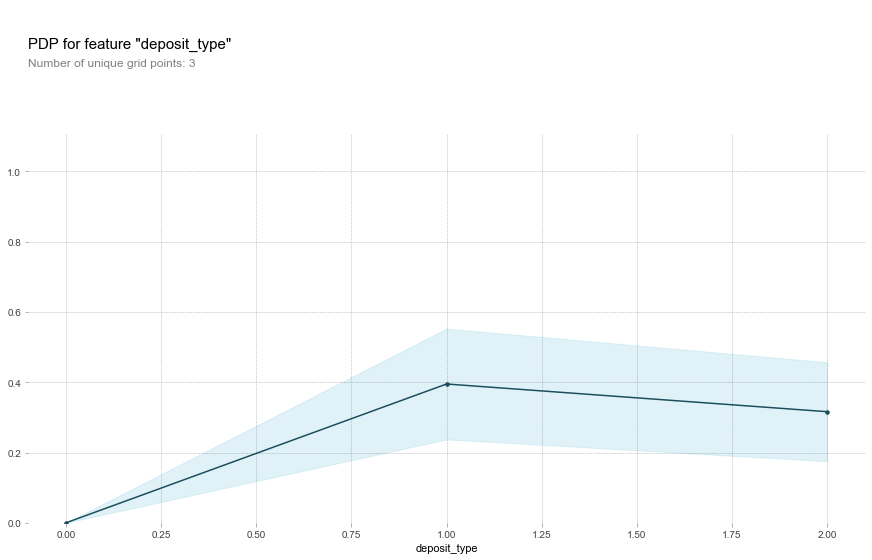

In [47]:
# pdp  - deposit_type
import matplotlib.pyplot as plt
from pdpbox import pdp

feature = 'deposit_type'
features = X_val.columns
pdp_dist = pdp.pdp_isolate(model = model,
                           dataset = X_val,
                           model_features = features,
                           feature = feature)
pdp.pdp_plot(pdp_dist, feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1e202e3a988>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1e20433cf88>})

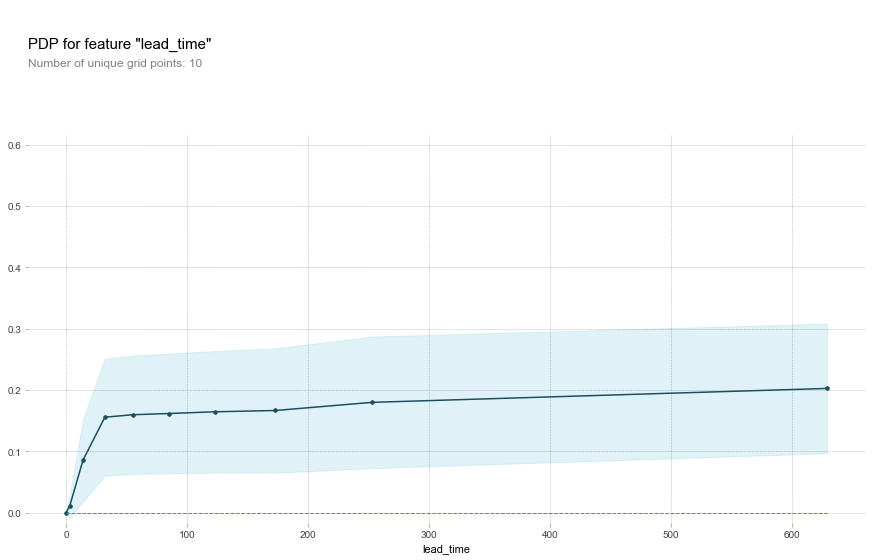

In [48]:
# pdp  - lead time
import matplotlib.pyplot as plt
from pdpbox import pdp

feature = 'lead_time'
features = X_val.columns
pdp_dist = pdp.pdp_isolate(model = model,
                           dataset = X_val,
                           model_features = features,
                           feature = feature)
pdp.pdp_plot(pdp_dist, feature)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1e204357508>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1e20442cd08>})

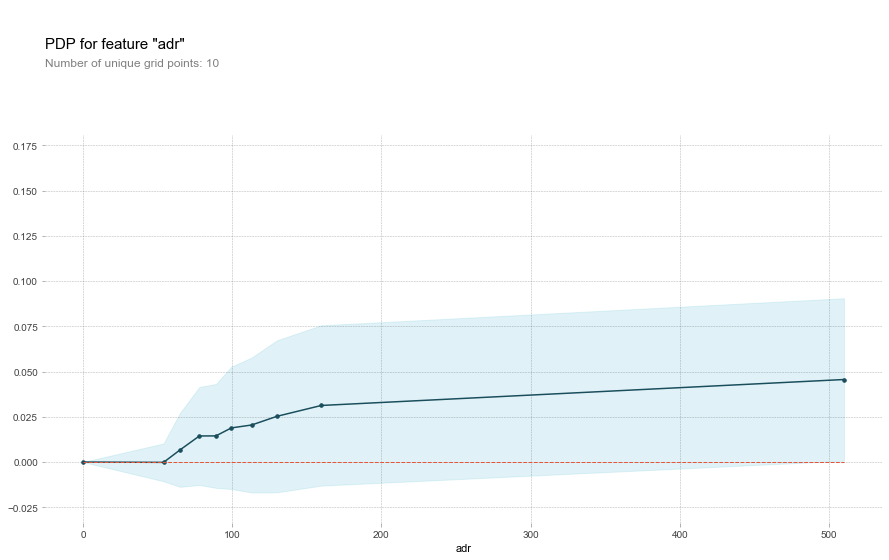

In [49]:
# pdp  - adr
import matplotlib.pyplot as plt
from pdpbox import pdp

feature = 'adr'
features = X_val.columns
pdp_dist = pdp.pdp_isolate(model = model,
                           dataset = X_val,
                           model_features = features,
                           feature = feature)
pdp.pdp_plot(pdp_dist, feature)